<a href="https://colab.research.google.com/github/rakasadiantara/2021frontend/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_I_Gede_Raka_Sadiantara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
#Type your code here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

from yellowbrick.cluster import KElbowVisualizer

import joblib

import warnings
warnings.filterwarnings('ignore')

print("Semua library yang dibutuhkan untuk proyek telah berhasil diimport.")

Semua library yang dibutuhkan untuk proyek telah berhasil diimport.


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.

df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

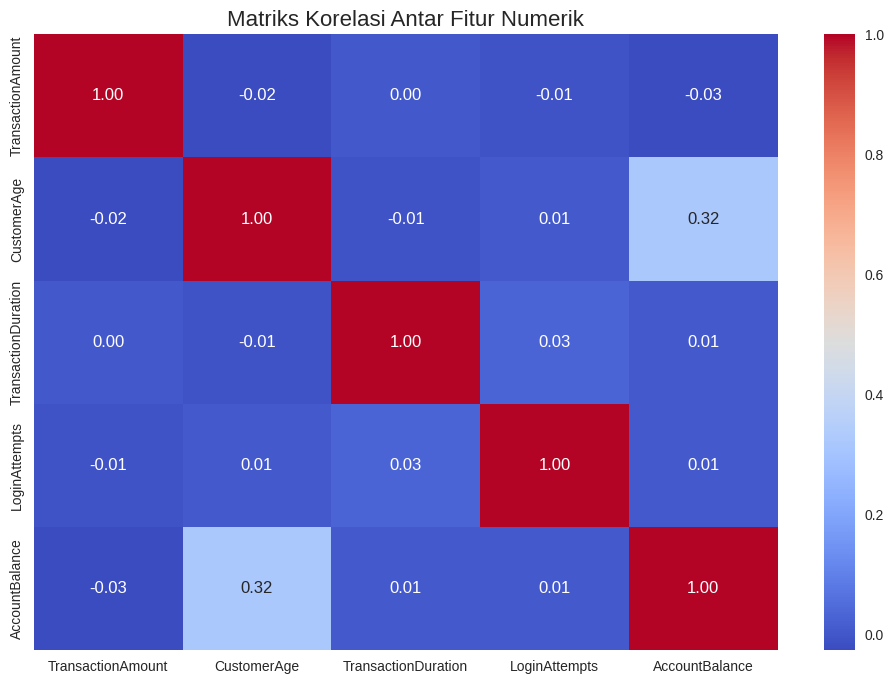

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Fitur Numerik', fontsize=16)
plt.show()

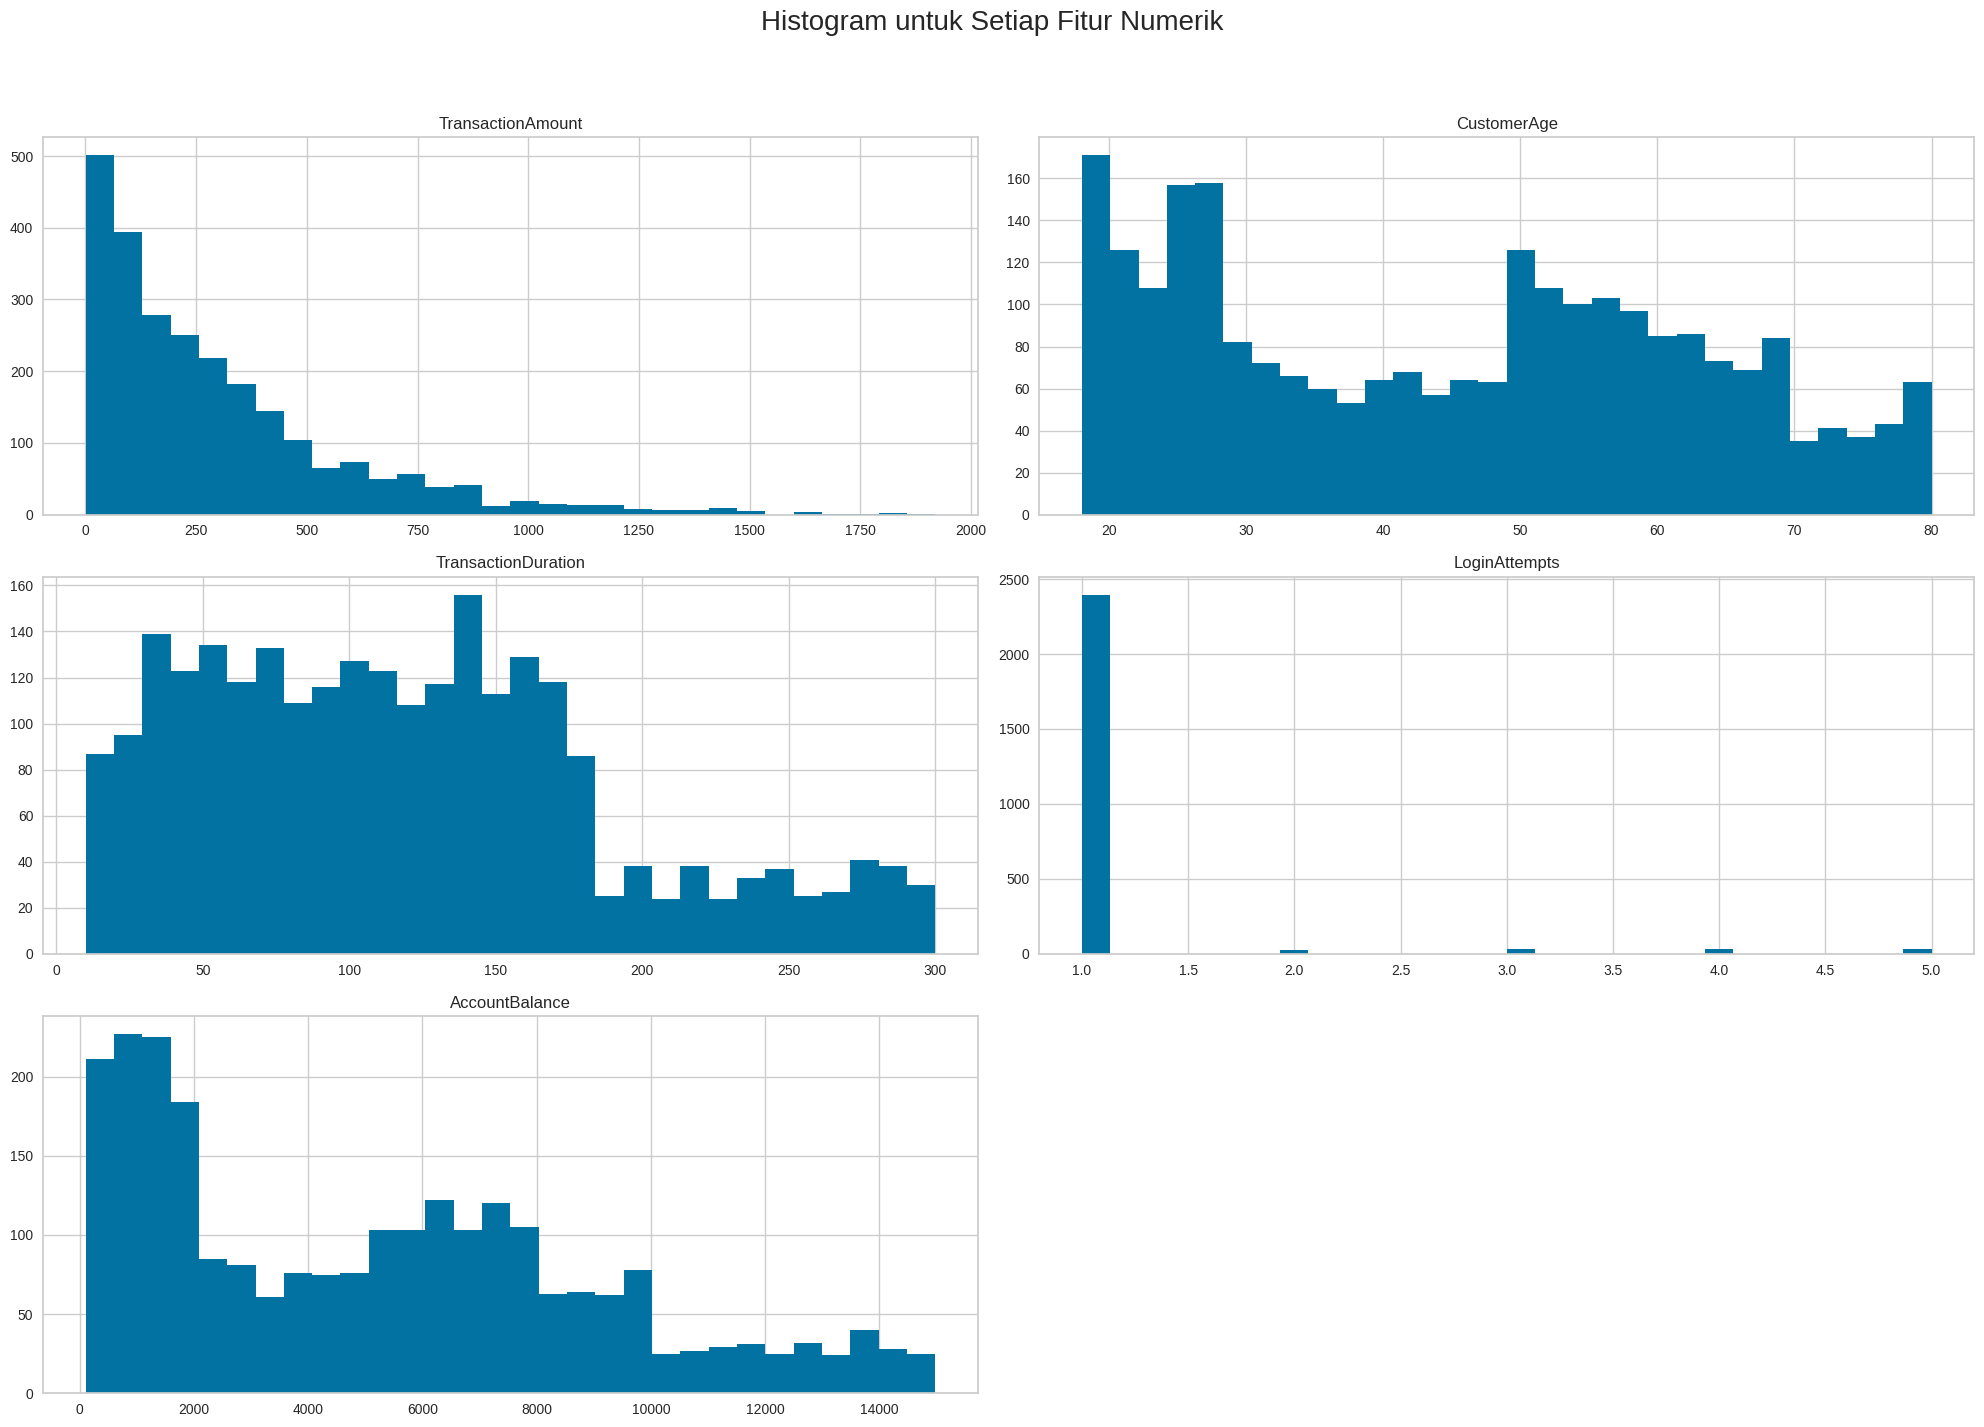

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histogram untuk Setiap Fitur Numerik', size=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Agar judul tidak tumpang tindih
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

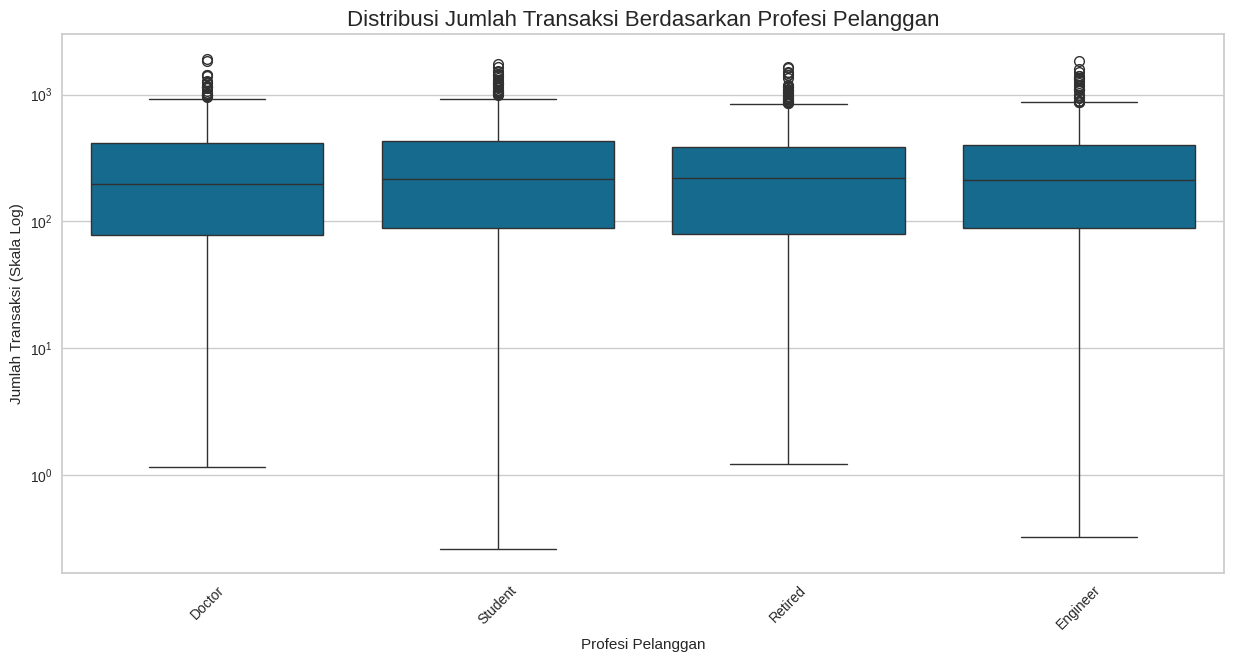

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='CustomerOccupation', y='TransactionAmount')
plt.title('Distribusi Jumlah Transaksi Berdasarkan Profesi Pelanggan', fontsize=16)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Profesi Pelanggan')
plt.ylabel('Jumlah Transaksi (Skala Log)')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()

print(df.isnull().sum())

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()

print(df.duplicated().sum())

21


In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

df_processed = df.copy()

numerical_features = df_processed.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

df_processed.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

id_cols_to_drop = ['TransactionID', 'AccountID', 'CustomerID', 'DeviceID', 'IP Address', 'MerchantID']

df_processed = df_processed.drop(columns=id_cols_to_drop, errors='ignore')

print("Kolom setelah drop ID:")
print(df_processed.columns.tolist())

Kolom setelah drop ID:
['TransactionAmount', 'PreviousTransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionDate']


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}

print("Memulai proses encoding dengan penyimpanan encoder...")
for col in categorical_features:
    le = LabelEncoder()

    df_processed[col] = le.fit_transform(df_processed[col])

    label_encoders[col] = le
    print(f"  - Kolom '{col}' berhasil di-encode dan encodernya disimpan.")

print("\nProses encoding utama selesai. Variabel 'label_encoders' sudah siap digunakan.")

df_processed.head()

Memulai proses encoding dengan penyimpanan encoder...
  - Kolom 'PreviousTransactionDate' berhasil di-encode dan encodernya disimpan.
  - Kolom 'TransactionType' berhasil di-encode dan encodernya disimpan.
  - Kolom 'Location' berhasil di-encode dan encodernya disimpan.
  - Kolom 'Channel' berhasil di-encode dan encodernya disimpan.
  - Kolom 'CustomerOccupation' berhasil di-encode dan encodernya disimpan.
  - Kolom 'TransactionDate' berhasil di-encode dan encodernya disimpan.

Proses encoding utama selesai. Variabel 'label_encoders' sudah siap digunakan.


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df_processed.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

print("Bentuk DataFrame sebelum menangani data hilang:", df.shape)

df_cleaned = df.dropna()

print("Bentuk DataFrame setelah menangani data hilang:", df_cleaned.shape)

Bentuk DataFrame sebelum menangani data hilang: (2537, 16)
Bentuk DataFrame setelah menangani data hilang: (2156, 16)


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

print("Bentuk DataFrame sebelum menghapus duplikat:", df_cleaned.shape)

df_cleaned.drop_duplicates(inplace=True)

print("Bentuk DataFrame setelah menghapus duplikat:", df_cleaned.shape)

Bentuk DataFrame sebelum menghapus duplikat: (2156, 16)
Bentuk DataFrame setelah menghapus duplikat: (2135, 16)


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

Q1 = df_cleaned['TransactionAmount'].quantile(0.25)
Q3 = df_cleaned['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_cleaned[(df_cleaned['TransactionAmount'] >= lower_bound) & (df_cleaned['TransactionAmount'] <= upper_bound)]

print("Bentuk DataFrame sebelum handling outlier:", df_cleaned.shape)
print("Bentuk DataFrame setelah handling outlier:", df_no_outliers.shape)

Bentuk DataFrame sebelum handling outlier: (2135, 16)
Bentuk DataFrame setelah handling outlier: (2042, 16)


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

df_binned = df_no_outliers.copy()

bins = [0, 18, 35, 60, 100]
labels = ['Remaja', 'Dewasa_Muda', 'Dewasa', 'Lansia']
df_binned['AgeGroup'] = pd.cut(df_binned['CustomerAge'], bins=bins, labels=labels, right=False)

le_age = LabelEncoder()
df_binned['AgeGroup_Encoded'] = le_age.fit_transform(df_binned['AgeGroup'])

df_binned[['CustomerAge', 'AgeGroup', 'AgeGroup_Encoded']].head()

,CustomerAge,AgeGroup,AgeGroup_Encoded
0,70.0,Lansia,2
1,68.0,Lansia,2
2,19.0,Dewasa_Muda,1
3,26.0,Dewasa_Muda,1
5,18.0,Dewasa_Muda,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df_processed.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2.511000e+03,2537.000000,2537.000000,2537.000000,2537.000000,2.519000e+03,2537.000000,2.511000e+03,2.516000e+03,2.510000e+03,2537.000000
mean,1.542197e-16,1255.665353,0.789121,21.319275,1.009460,1.029568e-16,1.530942,-5.659440e-17,-1.496771e-16,1.624199e-16,180.991328
std,1.000199e+00,725.645819,0.436044,12.394402,0.830646,1.000199e+00,1.149307,1.000199e+00,1.000199e+00,1.000199e+00,103.966932
min,-1.017881e+00,0.000000,0.000000,0.000000,0.000000,-1.495947e+00,0.000000,-1.561745e+00,-2.046294e-01,-1.286100e+00,0.000000
25%,-7.404760e-01,629.000000,1.000000,11.000000,0.000000,-9.912877e-01,1.000000,-8.052993e-01,-2.046294e-01,-9.259754e-01,92.000000
50%,-2.953617e-01,1255.000000,1.000000,21.000000,1.000000,1.803070e-02,2.000000,-1.059443e-01,-2.046294e-01,-9.733352e-02,181.000000
75%,3.951387e-01,1884.000000,1.000000,32.000000,2.000000,8.030561e-01,3.000000,5.934107e-01,-2.046294e-01,6.566894e-01,272.000000
max,5.549651e+00,2485.000000,2.000000,43.000000,3.000000,1.980594e+00,4.000000,2.577295e+00,6.525404e+00,2.531190e+00,360.000000


Jumlah total nilai NaN sebelum dibersihkan: 118
Jumlah total nilai NaN setelah dibersihkan: 0
--------------------------------------------------


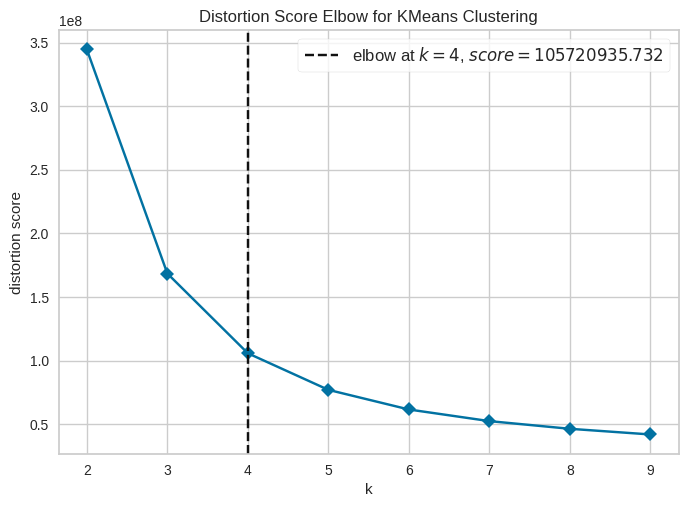

Jumlah cluster (K) yang optimal adalah: 4


In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

print("Jumlah total nilai NaN sebelum dibersihkan:", df_processed.isnull().sum().sum())

df_processed.dropna(inplace=True)

print("Jumlah total nilai NaN setelah dibersihkan:", df_processed.isnull().sum().sum())
print("-" * 50)

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(df_processed)
visualizer.show()

optimal_k = visualizer.elbow_value_
print(f"Jumlah cluster (K) yang optimal adalah: {optimal_k}")

In [ ]:
# Menggunakan algoritma K-Means Clustering

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

kmeans_model.fit(df_processed)

df_processed['cluster'] = kmeans_model.labels_

print(f"Model K-Means dengan {optimal_k} cluster berhasil dilatih.")

Model K-Means dengan 4 cluster berhasil dilatih.


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

joblib.dump(kmeans_model, "model_clustering.h5")

print("Model clustering berhasil disimpan sebagai 'model_clustering.h5'")

Model clustering berhasil disimpan sebagai 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

score = silhouette_score(df_processed.drop('cluster', axis=1), kmeans_model.labels_)

print(f"Nilai Silhouette Score adalah: {score}")

Nilai Silhouette Score adalah: 0.49970870273267215


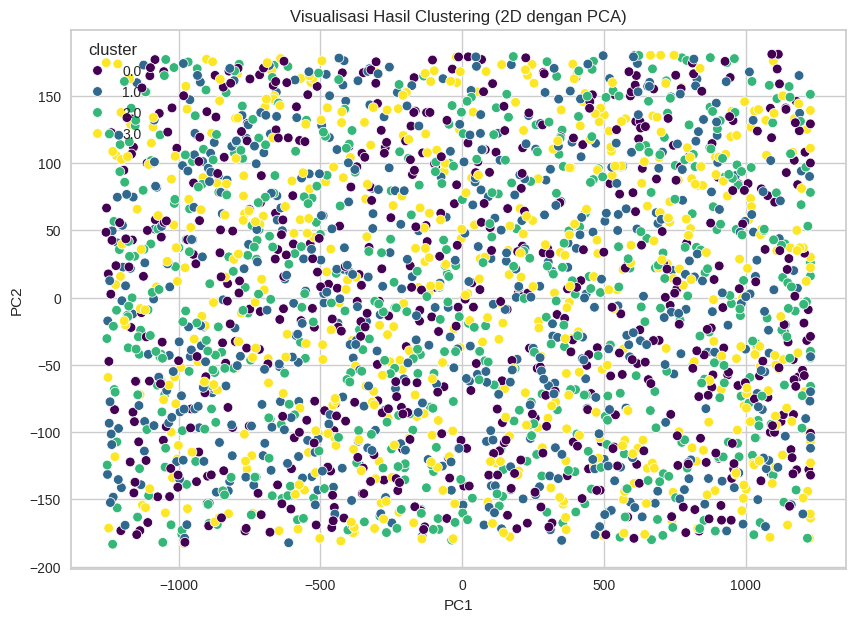

In [ ]:
# Membuat visualisasi hasil clustering

pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_processed.drop('cluster', axis=1))

df_visualization = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_visualization['cluster'] = df_processed['cluster']

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_visualization, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('Visualisasi Hasil Clustering (2D dengan PCA)')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

pca = PCA(n_components=3)

data_pca = pca.fit_transform(df_processed.drop('cluster', axis=1))

data_final = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3'])

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca.fit(data_final)

print("Model K-Means dengan data PCA berhasil dilatih.")

Model K-Means dengan data PCA berhasil dilatih.


In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

print("Model K-Means dengan PCA berhasil disimpan sebagai 'PCA_model_clustering.h5'")

Model K-Means dengan PCA berhasil disimpan sebagai 'PCA_model_clustering.h5'


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

if 'cluster' in df_processed.columns:
    aggregations = ['mean', 'min', 'max', 'median', 'count']

    cluster_analysis = df_processed.groupby('cluster').agg(aggregations)

    print("--- Analisis Deskriptif per Cluster ---")
    display(cluster_analysis)
else:
    print("ERROR: Kolom 'cluster' tidak ditemukan di df_processed. Pastikan model K-Means sudah di-fit dan label sudah ditambahkan ke DataFrame.")

--- Analisis Deskriptif per Cluster ---


TransactionAmount                                      \
                     mean       min       max    median count   
cluster                                                         
0                0.079633 -1.017676  5.248151 -0.284478   609   
1               -0.052694 -1.013945  5.549651 -0.336878   606   
2               -0.016056 -1.017881  4.620849 -0.294215   608   
3               -0.014229 -1.015827  5.244659 -0.279823   597   

        PreviousTransactionDate                            ... AccountBalance  \
                           mean   min   max  median count  ...           mean   
cluster                                                    ...                  
0                   1565.075534  1247  1881  1569.0   609  ...      -0.027293   
1                    931.265677   618  1246   930.5   606  ...      -0.010174   
2                   2199.527961  1882  2485  2201.5   608  ...       0.031890   
3                    309.122278     0   619   310.0   597  ...      -0.022109   

                                            TransactionDate                  \
              min       max    median count            mean min  max median   
cluster                                                                       
0       -1.286100  2.520287 -0.153104   609      181.298851   0  360  183.0   
1       -1.284661  2.512436 -0.137175   606      172.825083   0  360  172.0   
2       -1.274746  2.531190 -0.043272   608      181.689145   0  360  181.0   
3       -1.285856  2.522155 -0.121900   597      188.840871   0  360  195.0   

               
        count  
cluster        
0         609  
1         606  
2         608  
3         597  

[4 rows x 55 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (High Spenders / Pembelanja Besar)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>TransactionAmount: 0.080 (Paling Tinggi)
  - **Analisis:** Cluster ini mewakili kelompok pembelanja besar, yang ditandai dengan TransactionAmount rata-rata (mean) sebesar 0.080, nilai paling tinggi di antara semua cluster. Meskipun AccountBalance rata-rata mereka tidak tinggi, ini justru mengindikasikan bahwa dana yang ada di akun mereka aktif digunakan untuk bertransaksi dalam jumlah besar. Kelompok ini sangat berharga dan bisa menjadi target untuk produk-produk premium.
2. **Cluster 1: (Active Users / Pengguna Aktif & Transaksi Kecil)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>PreviousTransactionDate: 309.12 (Paling Rendah / Paling Aktif)
  - **Analisis:** Cluster ini adalah kelompok pengguna yang paling aktif. Ciri utama mereka adalah nilai PreviousTransactionDate rata-rata (mean) yang paling rendah, yaitu 309.12, menandakan waktu sejak transaksi terakhir mereka adalah yang paling singkat. Namun, TransactionAmount rata-rata mereka tergolong rendah (-0.014). Mereka adalah pengguna harian atau reguler yang loyal, cocok untuk program loyalitas atau penawaran produk langganan.
3. **Cluster 2: (Inactive Customers / Nasabah Tidak Aktif)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>PreviousTransactionDate: 2199.52 (Paling Tinggi / Paling Tidak Aktif)
  - **Analisis:** Cluster ini dengan jelas mengidentifikasi kelompok nasabah yang tidak aktif atau dormant. Hal ini terbukti dari nilai PreviousTransactionDate rata-rata (mean) yang jauh paling tinggi, yaitu sebesar 2199.52. Angka ini menunjukkan transaksi terakhir mereka terjadi paling lama di antara semua kelompok, sehingga mereka memiliki risiko churn (berpindah ke lain layanan) yang sangat tinggi dan memerlukan strategi re-engagement khusus.
4. **Cluster 3: (Savers / Para Penabung)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>AccountBalance: -0.010
  - **Analisis:** Ciri khas cluster ini adalah sebagai kelompok para penabung. Mereka memiliki AccountBalance rata-rata (mean) yang paling tinggi di antara semua cluster, yaitu -0.010. Namun, mereka tidak terlalu aktif dalam membelanjakannya, yang terlihat dari TransactionAmount rata-rata yang rendah (-0.053). Mereka bisa menjadi target untuk produk investasi, deposito, atau produk lain yang berfokus pada pertumbuhan aset.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

df_processed.rename(columns={'cluster': 'Target'}, inplace=True)

print("Nama kolom setelah diubah:")
print(df_processed.columns.tolist())

Nama kolom setelah diubah:
['TransactionAmount', 'PreviousTransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionDate', 'Target']


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

df_processed.to_csv('data_clustering.csv', index=False)

print("DataFrame berhasil disimpan sebagai 'data_clustering.csv'")

DataFrame berhasil disimpan sebagai 'data_clustering.csv'


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

df_inverse = df_processed.copy()

df_inverse[numerical_features] = scaler.inverse_transform(df_inverse[numerical_features])

df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,1
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,1
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,0
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,1
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,1


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

for col in categorical_features:
    le = label_encoders[col]

    df_inverse[col] = le.inverse_transform(df_inverse[col])

df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,1
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

print("Mengecek dan memperbaiki duplikat nama kolom pada 'df_inverse'...")
if 'df_inverse' in locals() and df_inverse.columns.duplicated().any():
    print(f"Bentuk DataFrame SEBELUM perbaikan: {df_inverse.shape}")

    df_inverse = df_inverse.loc[:, ~df_inverse.columns.duplicated()]

    print(f"Bentuk DataFrame SETELAH perbaikan: {df_inverse.shape}")
    print("Duplikat nama kolom berhasil diatasi.")
else:
    print("Tidak ditemukan duplikat nama kolom atau DataFrame 'df_inverse' tidak ada.")
print("-" * 50)

if 'df_inverse' in locals() and 'Target' in df_inverse.columns:

    numerical_features = df_inverse.select_dtypes(include=np.number).columns.tolist()
    categorical_features = df_inverse.select_dtypes(include='object').columns.tolist()

    if 'Target' in numerical_features:
        numerical_features.remove('Target')

    print("--- Analisis Deskriptif untuk Fitur Numerik (Data Asli) ---")
    numerical_analysis_inverse = df_inverse.groupby('Target')[numerical_features].agg(['mean', 'min', 'max', 'median'])
    display(numerical_analysis_inverse)

    print("\n" + "="*50 + "\n")

    if categorical_features:
        print("--- Analisis Deskriptif untuk Fitur Kategorikal (Data Asli) ---")
        categorical_analysis_inverse = df_inverse.groupby('Target')[categorical_features].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
        display(categorical_analysis_inverse)

else:
    print("ERROR: DataFrame 'df_inverse' atau kolom 'Target' tidak ditemukan setelah proses perbaikan.")

Mengecek dan memperbaiki duplikat nama kolom pada 'df_inverse'...
Tidak ditemukan duplikat nama kolom atau DataFrame 'df_inverse' tidak ada.
--------------------------------------------------
--- Analisis Deskriptif untuk Fitur Numerik (Data Asli) ---


TransactionAmount                         CustomerAge              \
                    mean   min      max   median        mean   min   max   
Target                                                                     
0             320.922972  0.32  1831.02  214.540   45.418719  18.0  80.0   
1             282.260759  1.41  1919.11  199.230   44.841584  18.0  80.0   
2             292.965378  0.26  1647.74  211.695   44.856908  18.0  80.0   
3             293.499079  0.86  1830.00  215.900   43.520938  18.0  80.0   

              TransactionDuration                     LoginAttempts            \
       median                mean   min    max median          mean  min  max   
Target                                                                          
0        47.0          121.436782  10.0  299.0  115.0      1.093596  1.0  5.0   
1        45.0          118.283828  10.0  298.0  114.0      1.112211  1.0  5.0   
2        46.0          121.189145  10.0  300.0  110.0      1.126645  1.0  5.0   
3        41.0          116.500838  10.0  299.0  109.0      1.144054  1.0  5.0   

              AccountBalance                             
       median           mean     min       max   median  
Target                                                   
0         1.0    5007.070066  101.25  14935.50  4516.76  
1         1.0    5073.789934  106.86  14904.90  4578.84  
2         1.0    5237.717993  145.50  14977.99  4944.80  
3         1.0    5027.274472  102.20  14942.78  4638.37



--- Analisis Deskriptif untuk Fitur Kategorikal (Data Asli) ---


,PreviousTransactionDate,TransactionType,Location,Channel,CustomerOccupation,TransactionDate
Target,,,,,,
0,2023-07-31 16:25:26,Debit,San Antonio,ATM,Retired,2024-11-04 8:12:18
1,2023-04-10 17:04:28,Debit,Atlanta,Branch,Student,2024-11-04 8:09:17
2,2023-10-20 17:53:13,Debit,Fort Worth,Online,Engineer,2024-11-04 8:07:38
3,2023-01-02 16:45:05,Debit,Boston,Branch,Student,2024-11-04 8:10:23


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Premium / Premium Customers)**:
  - **Rata-rata (mean) <Fitur>:** TransactionAmount: 0.07 (Sebelum inverse) -> 320.92 (Setelah inverse)
  - **Analisis:** Cluster ini mewakili segmen nasabah terbaik Anda. Mereka memiliki TransactionAmount rata-rata (mean) yang paling tinggi, yaitu sebesar 320.92. Selain itu, mereka juga memiliki LoginAttempts rata-rata yang paling rendah (1.09), menandakan mereka adalah pengguna yang mahir dan percaya diri. Kombinasi daya beli tertinggi dan kemudahan penggunaan platform menjadikan mereka nasabah premium yang ideal.
2. **Cluster 1: (Pembelanja Paling Hemat / Most Economical Spenders)**:
  - **Rata-rata (mean) <Fitur>:**  TransactionAmount: -0.05 (Sebelum inverse) -> 282.26 (Setelah inverse)
  - **Analisis:**  Kelompok ini adalah nasabah yang paling berhati-hati dalam pengeluaran. Hal ini ditunjukkan oleh TransactionAmount rata-rata (mean) yang paling rendah di antara semua cluster, yaitu sebesar 282.26. Mereka adalah segmen yang sensitif terhadap harga dan bisa menjadi target untuk promosi diskon atau produk dengan nilai yang lebih ekonomis.
3. **Cluster 2: (Nasabah Standar / Standard Customers)**:
  - **Rata-rata (mean) <Fitur>:** TransactionAmount: -0.016 (Sebelum inverse) -> 292.96 (Setelah inverse)
  - **Analisis:** Cluster ini merupakan representasi dari nasabah pada umumnya. Nilai TransactionAmount rata-rata mereka berada di tingkat menengah, yaitu 292.96. Tidak ada metrik yang ekstrem pada kelompok ini, menandakan mereka adalah basis pelanggan yang stabil dan melakukan transaksi secara wajar, menjadikan mereka fondasi bisnis yang solid.
4. **Cluster 3: (Nasabah Bernilai Tinggi, Berpotensi Risiko / High-Value)**:
  - **Rata-rata (mean) <Fitur>:** TransactionAmount: -0.014 (Sebelum inverse) -> 293.50 (Setelah inverse)
  - **Analisis:** Cluster ini adalah segmen yang menarik dan memerlukan perhatian khusus. Mereka memiliki daya beli yang tinggi, dengan TransactionAmount rata-rata sebesar 293.50, hampir setara dengan nasabah premium. Namun, mereka juga memiliki LoginAttempts rata-rata yang paling tinggi (1.14). Hal ini bisa mengindikasikan bahwa meskipun mereka bernilai tinggi, mereka mungkin mengalami kesulitan teknis dengan platform, yang bisa menjadi risiko churn jika tidak dibantu.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

print("Verifikasi data final yang sudah terintegrasi (5 baris pertama):")
display(df_inverse.head())

print("\nKolom yang ada di dalam DataFrame final:")
print(df_inverse.columns.tolist())

Verifikasi data final yang sudah terintegrasi (5 baris pertama):


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,1
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1



Kolom yang ada di dalam DataFrame final:
['TransactionAmount', 'PreviousTransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionDate', 'Target']


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

df_inverse.to_csv('data_clustering_inverse.csv', index=False)

print("DataFrame hasil inverse berhasil disimpan sebagai 'data_clustering_inverse.csv'")

DataFrame hasil inverse berhasil disimpan sebagai 'data_clustering_inverse.csv'


End of Code.